A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Danillo de Sousa Fiorenza
Olá, Danillo de Sousa Fiorenza!
Bom trabalho!


In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx


from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [197]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [ ]:
q = '''CREATE TABLE IF NOT EXISTS aluno
       (id INTEGER PRIMARY KEY AUTOINCREMENT ,nome text ,data_nascimento date ,matricula INT);'''

cur.execute(q)

Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [236]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [ ]:
cur.execute('select*from iris')
for r in cur.fetchall():
    print(r)

In [ ]:
#a)
quantidade = 'select count(*) from (select * from iris group by Species)'

cur.execute(quantidade)
for r in cur.fetchall():
    print(r)

In [ ]:
#b)
registro = 'select count(*) from iris'

cur.execute(registro)
for r in cur.fetchall():
    print(r)

In [ ]:
#c)
c='select max(area), Species from (select avg(PetalLengthCm*PetalWidthCm) as area, Species from iris group by Species)'

cur.execute(c)
for r in cur.fetchall():
    print(r)

In [ ]:
#d)
d='select max(area), Species from (select AVG(PetalLengthCm*PetalWidthCm+SepalLengthCm*SepalWidthCm) as area, Species from iris group by Species)'

cur.execute(d)
for r in cur.fetchall():
    print(r)

Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [ ]:
#a)
df = pd.read_excel('../../Dados/votesurvey.xls')
df.head(15)

In [138]:
#b)
bush=df[df.Candidate == 'Bush']
gore=df[df.Candidate == 'Gore']

In [140]:
bush.mean()

Age                        27.000000
Salary before Stern     79000.000000
Expected salary        111666.666667
dtype: float64

In [141]:
gore.mean()

Age                        27.277778
Salary before Stern     71722.222222
Expected salary        103055.555556
dtype: float64

In [ ]:
#c)
homem=df[df.Gender == 'Male']
mulher=df[df.Gender == 'Female']


In [146]:
homem.mean()

Age                        27.617647
Salary before Stern     73705.882353
Expected salary        113088.235294
dtype: float64

In [147]:
mulher.mean()

Age                       26.142857
Salary before Stern    61500.000000
Expected salary        99642.857143
dtype: float64

In [149]:
idade=df.sort_values('Age')
idade
#analisando essa tabela nota-se que a idade nao influencia no salário,visto que não há nenhum padrão de crescimento conforme a idade aumenta
#logo é razoável dizer que o sexo influencia mais, basta ver as médias calculadas acima

,Gender,Age,Salary before Stern,Expected salary,Candidate
6,Female,24,55000,100000,Bush
10,Female,24,59000,90000,Bush
23,Female,25,45000,85000,Gore
43,Female,25,45000,80000,Undecided
30,Female,25,49000,85000,Gore
39,Male,25,5000,100000,Refuse to answer
37,Male,25,125000,135000,Refuse to answer
31,Male,25,50000,75000,Gore
16,Male,25,60000,150000,Gore
15,Male,25,45000,100000,Gore


In [ ]:
#d)
df['SalaryAge']=df['Salary before Stern']/df['Age']
df

Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [234]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [ ]:
#a)
letrasa=['A','a','Á','á','Â','â','Ã','ã']
dictpalavras={}
for k in texto.split():
    k=k.strip(',:;@"?!/=()[#%{}+_$=')
    k=str(k)
    if k[0] in letrasa:
        if (k in dictpalavras) :
            dictpalavras[k]+=1
        else:
            dictpalavras[k]=1

sorted(dictpalavras.items(), key=lambda x: (-x[1], x[0]))
#sao as 10 primeiras do dicionario e considerei os acentos

    


In [279]:
#b)
maiusculas=[]
for k in texto.split():
    k=k.strip(',:;@"?!/=()[#%{}+_$=')
    k=str(k)
    if k[0] in string.ascii_uppercase or k[0] in 'ÁÉÍÓÚÂÊÛÔÃÕÀ':
        if (k not in maiusculas) :
            maiusculas.append(k)
len(maiusculas)
        


1584

In [ ]:
letrasa=['A','a','Á','á','Â','â','Ã','ã']
dictpalavras={}
for k in texto.split():
    k=k.strip(',:;@"?!/=()[#%{}+_$=')
    k=str(k)
    if k[0] in letrasa:
        if (k in dictpalavras) :
            dictpalavras[k]+=1
        else:
            dictpalavras[k]=1

sorted(dictpalavras.items(), key=lambda x: (-x[1], x[0]))
#sao as 10 primeiras do dicionario e considerei os acentos


In [226]:
#c)
vogais=['A','a','Á','á','Â','â','Ã','ã','É','Ê','Í','Ó','Ô','Ú','é','ê','í','ô','ó','õ','ú','u','o','e','U','O','E','I','i',]
umavogal=[]
duasvogais=[]
tresvogais=[]
for i in texto.split():
    if (i not in umavogal) and (i not in duasvogais) and (i not in tresvogais):
        x=0
        for r in i :
            if (r in vogais): 
                x=x+1
        if x==1:
            umavogal.append(i)
        elif x==2:
            duasvogais.append(i)
        elif x==3:
            tresvogais.append(i)
        
        
print(len(umavogal))
print(len(duasvogais))
print(len(tresvogais))
#obs: não foi considerado a repetiçao das palavras, para considerar basta excluir o if(i not in umavogal) and (i not in duasvogais) and (i not in tresvogais)


777
3895
5257


Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [ ]:
#a)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '[AaÁáÂâÃã]$' |sort | uniq -c | sort -nr | sed 10q

In [224]:
#b)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '^[a-z]' | sort | uniq -c | wc -l


8535


In [ ]:
#c)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c 

Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [282]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()


In [283]:
#a)
q1= '''select customers.FirstName,customers.LastName, tracks.Name from customers 
            inner join invoices on customers.customerID = invoices.customerID
            inner join invoice_items ON invoices.invoiceID = invoice_items.invoiceID
            inner join tracks on invoice_items.trackID = tracks.trackID where customers.FirstName like "M%"'''
letraa=pd.read_sql_query(q1,conn)
letraa.head()

,FirstName,LastName,Name
0,Mark,Philips,Right Through You
1,Mark,Philips,Not The Doctor
2,Mark,Philips,Bleed The Freak
3,Mark,Philips,Confusion
4,Mark,Philips,Por Causa De Você


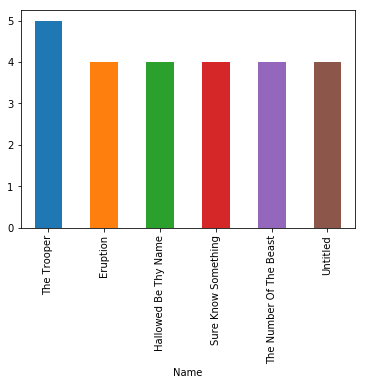

In [316]:
#b)
q2 = 'select sum(invoice_items.quantity) as p, tracks.name from invoice_items inner join tracks on invoice_items.trackID = tracks.trackID group by tracks.name order by p desc'
tracks=pd.read_sql_query(q2,conn)
maiscompradas=tracks.iloc[0:6]
maiscompradas.plot(x='Name', y='p', kind='bar', legend=False)

In [326]:
#c)..

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

Não considero meu aproveitamento muito bom, apesar de ter aprendido muito(principalmente nas semanas que antecedem as provas), acho que poderia ter sido melhor, em termos de conseguir acompanhar as aulas, obter mais fluência e aprender ainda mais coisas, inclusive o que não é dado em classe, pesquisando por conta própia.
Acredito que o curso em si seja ótimo,mas não me vejo em condições de avaliar isso agora, porque quando vou pesquisar sobre algum assunto da matéria , sempre vejo um infinidade de opções de módulos ou linguagens diferentes e sempre me pergunto se o que estou vendo em python vale a pena aprender, se algum dia eu me tornar melhor no assunto , eu poderia responder com mais convicção , de que o curso é muito bom e ajudou a iniciar os passos em LP. 
Mereço um 0.5 
